In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df = pd.read_csv("cardata.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [7]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [8]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [13]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [14]:
training_pred = model1.predict(x_train)
print("Linear model Training R2 Score = ",metrics.r2_score(training_pred,y_train))

Linear model Training R2 Score =  0.8635655509198658


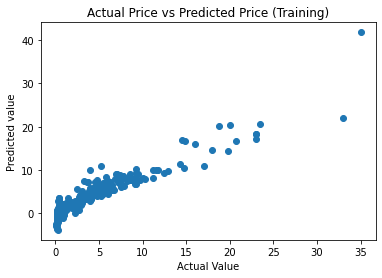

In [15]:
plt.scatter(y_train,training_pred)
plt.title("Actual Price vs Predicted Price (Training)")
plt.xlabel("Actual Value")
plt.ylabel("Predicted value")
plt.show()

In [16]:
testing_pred = model1.predict(x_test)
print("Linear model Testing R2 Score = ",metrics.r2_score(testing_pred,y_test))

Linear model Testing R2 Score =  0.8062199941176269


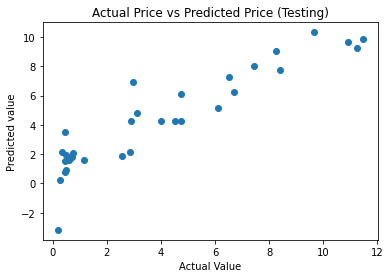

In [17]:
plt.scatter(y_test,testing_pred)
plt.title("Actual Price vs Predicted Price (Testing)")
plt.xlabel("Actual Value")
plt.ylabel("Predicted value")
plt.show()

In [18]:
model2 = Lasso()
model2.fit(x_train,y_train)

Lasso()

In [19]:
training_prediction = model2.predict(x_train)
print("Lasso model Training R2 Score = ",metrics.r2_score(training_prediction,y_train))

Lasso model Training R2 Score =  0.798459024070425


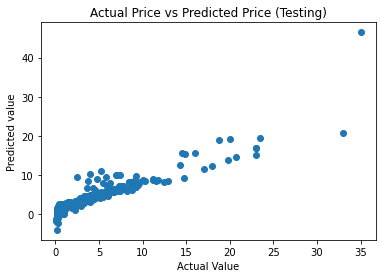

In [20]:
plt.scatter(y_train,training_prediction)
plt.title("Actual Price vs Predicted Price (Testing)")
plt.xlabel("Actual Value")
plt.ylabel("Predicted value")
plt.show()

In [21]:
testing_prediction = model2.predict(x_test)
print("Lasso model Testing R2 Score = ",metrics.r2_score(testing_prediction,y_test))

Lasso model Testing R2 Score =  0.7711110403265475


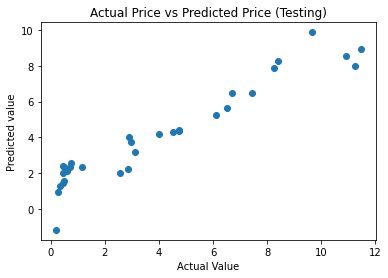

In [22]:
plt.scatter(y_test,testing_prediction)
plt.title("Actual Price vs Predicted Price (Testing)")
plt.xlabel("Actual Value")
plt.ylabel("Predicted value")
plt.show()

In [23]:
model3 = XGBRegressor()
model3.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
training_prediction = model3.predict(x_train)
print("XGB model Training R2 Score = ",metrics.r2_score(training_prediction,y_train))

XGB model Training R2 Score =  0.9999882347921428


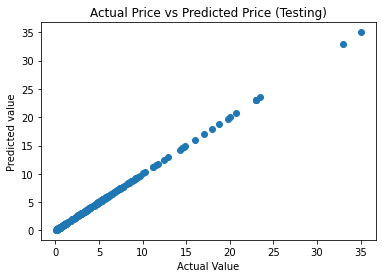

In [25]:
plt.scatter(y_train,training_prediction)
plt.title("Actual Price vs Predicted Price (Testing)")
plt.xlabel("Actual Value")
plt.ylabel("Predicted value")
plt.show()

In [26]:
testing_prediction = model3.predict(x_test)
print("XGB model Testing R2 Score = ",metrics.r2_score(testing_prediction,y_test))

XGB model Testing R2 Score =  0.9717000722567458


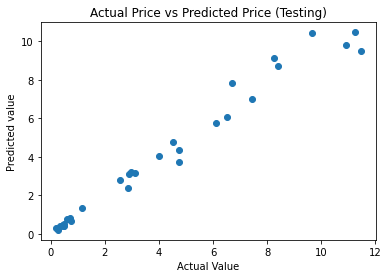

In [27]:
plt.scatter(y_test,testing_prediction)
plt.title("Actual Price vs Predicted Price (Testing)")
plt.xlabel("Actual Value")
plt.ylabel("Predicted value")
plt.show()

In [28]:
import pickle
filename = "Linear-model.sav"
pickle.dump(model1,open(filename,'wb'))

In [29]:
filename = "Lasso-model.sav"
pickle.dump(model1,open(filename,'wb'))

In [30]:
filename = "XGB-model.sav"
pickle.dump(model1,open(filename,'wb'))

In [34]:
input = (2015,5.09,35500,2,0,0,0)

arr = np.asarray(input)
data_reshape = arr.reshape(1,-1)
pred = model1.predict(data_reshape)

print("Car Selling Price (Linear Regression model) = ",pred)

# actual selling value was 3.25

Car Selling Price (Linear Regression model) =  [7.49802869]


In [35]:
input = (2015,5.09,35500,2,0,0,0)

arr = np.asarray(input)
data_reshape = arr.reshape(1,-1)
pred = model2.predict(data_reshape)

print("Car Selling Price (Lasso) = ",pred)

# actual selling value was 3.25

Car Selling Price (Lasso) =  [3.85355694]


In [36]:
input = (2015,5.09,35500,2,0,0,0)

arr = np.asarray(input)
data_reshape = arr.reshape(1,-1)
pred = model3.predict(data_reshape)

print("Car Selling Price (XGBRegressor) = ",pred)

# actual selling value was 3.25

Car Selling Price (XGBRegressor) =  [3.246188]
